In [1]:
# --- Cell 1: imports + style setup ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utilities.plotting_style as pstyle

pstyle.apply_style()  # palette=pstyle.OKABE_ITO or pstyle.OKABE_ITO
np.random.seed(7)


In [2]:
# --- Cell 2: Line chart data (3 series over time) ---
dates = pd.date_range("2025-01-01", periods=60, freq="D")
series = ["Alpha", "Beta", "Gamma"]

rows = []
base = {"Alpha": 12000, "Beta": 9000, "Gamma": 15000}
trend = {"Alpha": 35, "Beta": 25, "Gamma": 15}

for s in series:
    noise = np.random.normal(0, 500, size=len(dates))
    vals = base[s] + trend[s] * np.arange(len(dates)) + noise
    rows.extend([(d, s, max(0, v)) for d, v in zip(dates, vals)])

df_line = pd.DataFrame(rows, columns=["date", "series", "value"])
df_line.head()

,date,series,value
0,2025-01-01,Alpha,12845.262852
1,2025-01-02,Alpha,11802.031315
2,2025-01-03,Alpha,12086.410082
3,2025-01-04,Alpha,12308.758141
4,2025-01-05,Alpha,11745.538486


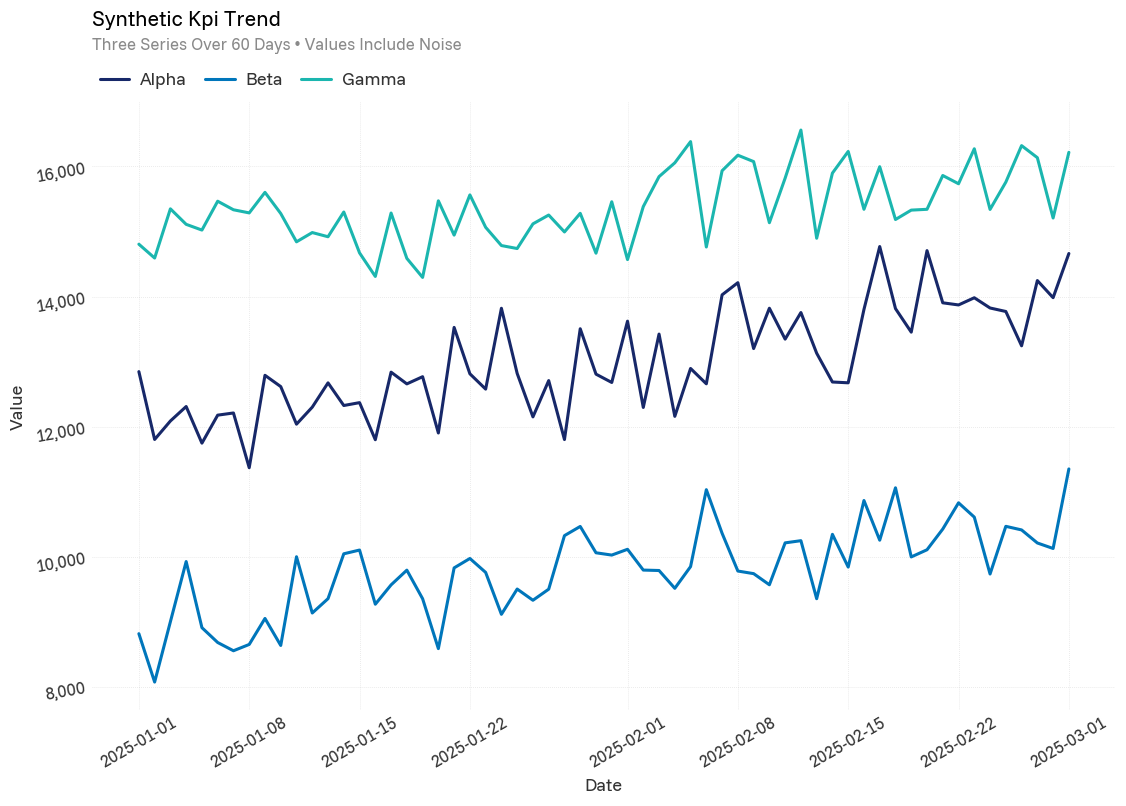

In [3]:
# --- Cell 3: Line chart ---
fig, ax = plt.subplots()

sns.lineplot(
    data=df_line,
    x="date",
    y="value",
    hue="series",
    ax=ax
)

pstyle.set_title(ax, "Synthetic KPI Trend", "Three series over 60 days • Values include noise")
pstyle.style_plot(ax, df=df_line, legend_column="series", format_thousands_axis="y")

#ax.set_xlabel("date")
#ax.set_ylabel("kpi value")



plt.show()

In [4]:
# --- Cell 4: Scatterplot data (with categories) ---
n = 220
channels = np.random.choice(["Search", "Social", "Display", "Video", "CTV", "Direct"], size=n, p=[0.15, 0.20, 0.25, 0.20, 0.10, 0.10])


spend = np.random.lognormal(mean=8.8, sigma=0.35, size=n)  # ~ 5k–30k-ish
# conversions: roughly correlated with spend, plus channel effects + noise
channel_effect = {"Search": 1.15, "Social": 0.95, "Display": 0.75, "Video": 0.85, "CTV": 1.3, "Direct": 0.6}
conv = (spend / 280) * np.array([channel_effect[c] for c in channels]) + np.random.normal(0, 6, size=n)
conv = np.clip(conv, 0, None)

df_scatter = pd.DataFrame({"spend": spend, "conversions": conv, "channel": channels})
df_scatter.head()

,spend,conversions,channel
0,4476.933707,28.655560,Video
1,5396.916964,25.016636,Search
2,7686.957516,41.057124,CTV
3,8692.293436,27.231054,Display
4,11859.048558,45.835520,Social


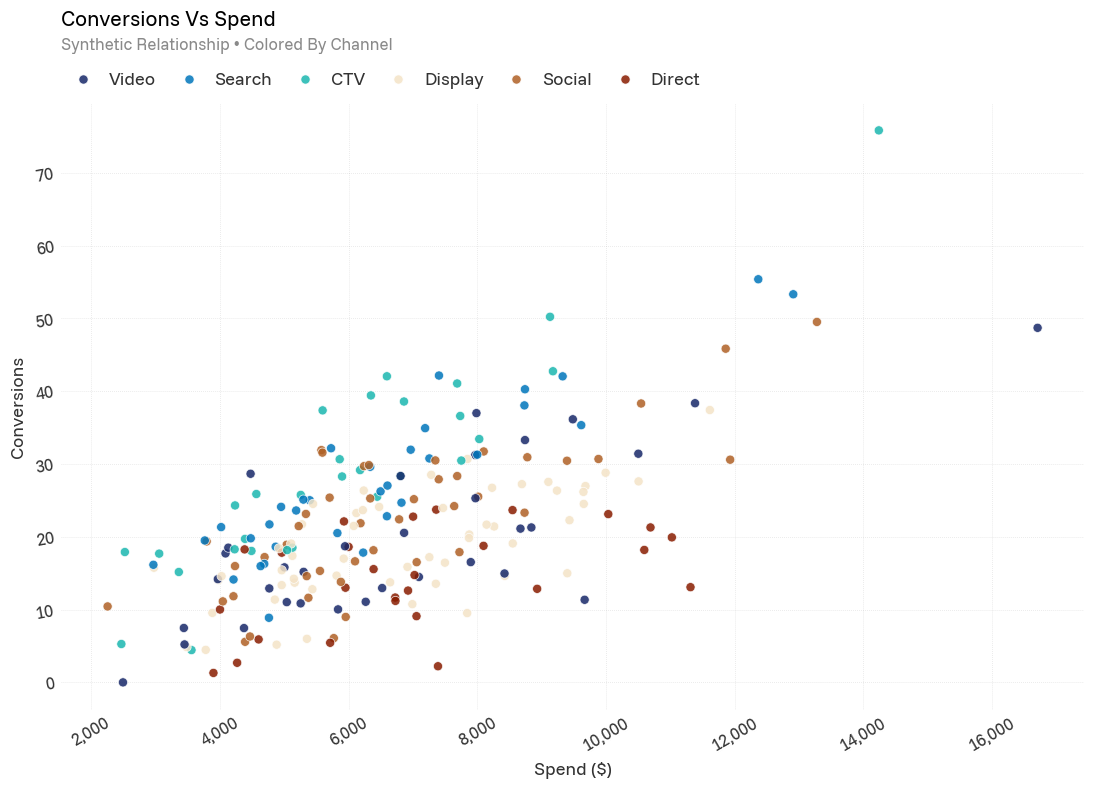

In [5]:
# --- Cell 5: Scatterplot ---
fig, ax = plt.subplots()

sns.scatterplot(
    data=df_scatter,
    x="spend",
    y="conversions",
    hue="channel",
    alpha=0.85,
    ax=ax
)

pstyle.set_title(ax, "Conversions vs Spend", "Synthetic relationship • colored by channel")
pstyle.style_plot(ax, df=df_scatter, legend_column="channel", format_thousands_axis="x")

ax.set_xlabel("Spend ($)")
ax.set_ylabel("Conversions")

plt.show()

In [6]:
# --- Cell 6: Heatmap data (correlations) ---
# Make a small “metrics” table and show correlations as a heatmap
m = 300
impressions = np.random.lognormal(12.0, 0.35, size=m)
clicks = impressions * np.random.uniform(0.001, 0.01, size=m)
spend = (impressions / 1000) * np.random.uniform(2.0, 9.0, size=m)  # CPM-ish
revenue = spend * np.random.uniform(1.0, 1.8, size=m) + np.random.normal(0, 50, size=m)

df_metrics = pd.DataFrame({
    "impressions": impressions,
    "clicks": clicks,
    "spend": spend,
    "revenue": revenue,
    "ctr": clicks / impressions,
    "rpm": revenue / (impressions / 1000),
})

corr = df_metrics.corr(numeric_only=True)
corr


,impressions,clicks,spend,revenue,ctr,rpm
impressions,1.000000,0.621609,0.605537,0.568713,0.085998,-0.068171
clicks,0.621609,1.000000,0.354347,0.312885,0.792282,-0.063932
spend,0.605537,0.354347,1.000000,0.929177,0.041963,0.623649
revenue,0.568713,0.312885,0.929177,1.000000,0.027290,0.740204
ctr,0.085998,0.792282,0.041963,0.027290,1.000000,-0.009769
rpm,-0.068171,-0.063932,0.623649,0.740204,-0.009769,1.000000


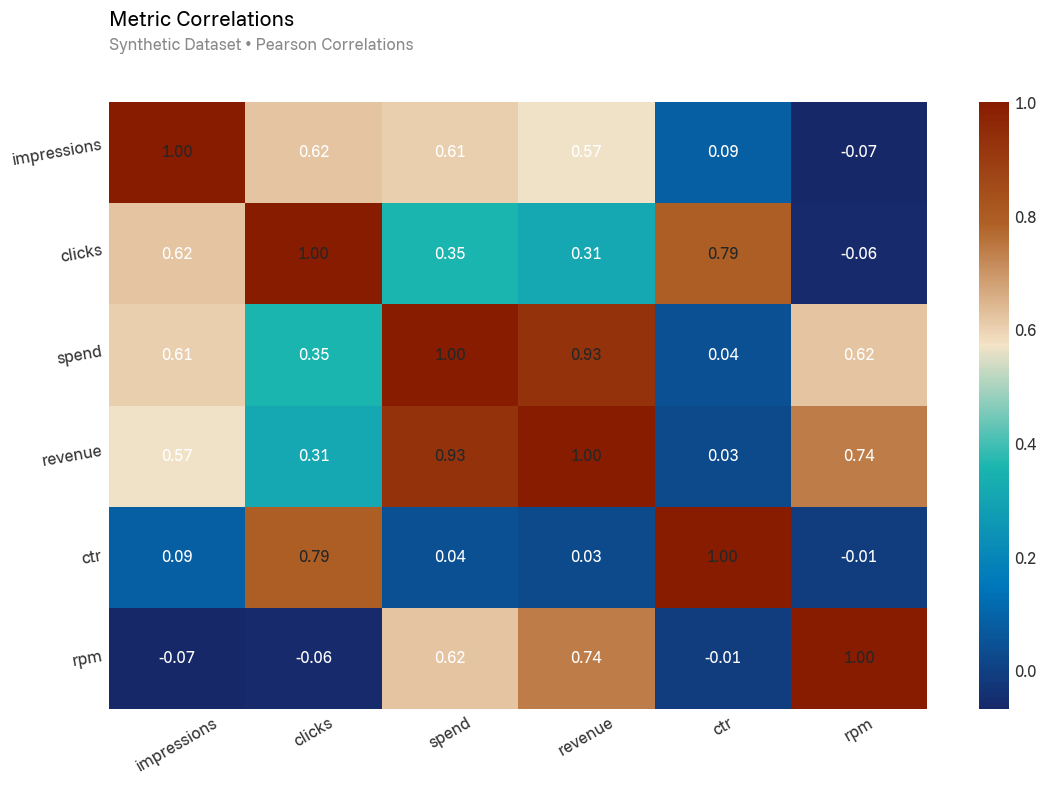

In [7]:
# --- Cell 7: Heatmap ---
fig, ax = plt.subplots()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    ax=ax,
)

pstyle.set_title(ax, "Metric Correlations", "Synthetic dataset • Pearson correlations")
pstyle.style_plot(ax, legend=False)  # no legend for heatmap

ax.set_xlabel("")
ax.set_ylabel("")
plt.show()
